# Exploración de base de datos de Atributos de calidad

> Se visitó el 14 de Diciembre de 2019 el sitio http://ctp.di.fct.unl.pt/RE2017/pages/submission/data_papers/

Se encuentran tres _datasets_, sin embargo in interés principal de este estudio es identificar _Quality Attributes_, así que se utiliza la base de datos de [_Quality Attributes_](http://ctp.di.fct.unl.pt/RE2017//downloads/datasets/nfr.arff) que pertenece a [_TeraPROMISE_](https://terapromise.csc.ncsu.edu/!/#repo/view/head/requirements/nfr) y se queda a discusión usar [_SecReq_](http://www.se.uni-hannover.de/pages/en:projekte_re_secreq), que sólo involucra atributos de seguridad.

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Ocultar/Mostrar Código"></form>''')

In [42]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt
alt.renderers.enable("default")

from pywaffle import Waffle

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('nfr.csv')
data

,ProjectID,RequirementText,class
0,1,'The system shall refresh the display every 60...,PE
1,1,'The application shall match the color of the ...,LF
2,1,' If projected the data must be readable. On...,US
3,1,' The product shall be available during normal...,A
4,1,' If projected the data must be understandabl...,US
...,...,...,...
620,15,'\tUser access should be limited to the permis...,SE
621,15,' \tThe product must comply with the intranet ...,LF
622,15,' The intranet pages should display appropriat...,LF
623,15,' \tThe users should be able to easily use the...,US


## Análisis Exploratorio de Datos

In [3]:
bars = alt.Chart(data).mark_bar(size=50).encode(
    x=alt.X("class", axis=alt.Axis(title='Categoría')),
    y=alt.Y("count():Q", axis=alt.Axis(title='Frecuencia')),
    tooltip=[alt.Tooltip('count()', title='Frecuencia'), 'class'],
    color='class'

)

text = bars.mark_text(
    align='center',
    baseline='bottom',
).encode(
    text='count()'
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "Distribución de las Categorías",
)

alt.LayerChart(...)

In [4]:
data['id'] = 1
df2 = pd.DataFrame(data.groupby('class').count()['id']).reset_index()

bars = alt.Chart(df2).mark_bar(size=50).encode(
    x=alt.X('class'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='Porcentaje de requisitos')),
    color='class'
).transform_window(
    TotalArticles='sum(id)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.id / datum.TotalArticles"
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
    #dx=5  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.2%')
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "Distribución porcentual de las categorías",
)

alt.LayerChart(...)

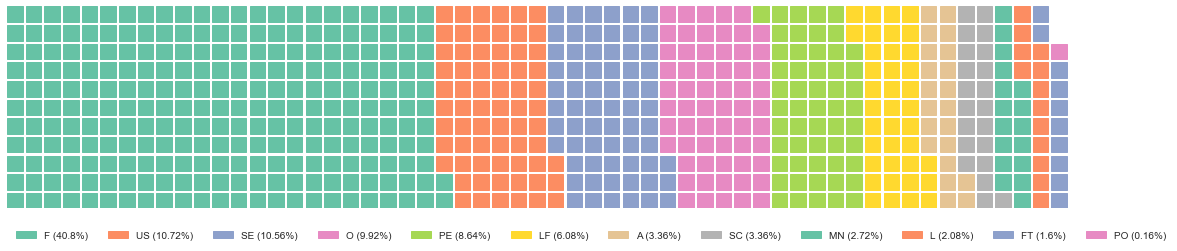

In [5]:
percentage = data['class'].value_counts(normalize=True) * 100
percentage = percentage.round(2)
fig = plt.figure(
    FigureClass=Waffle, 
    columns=60,
    values=data['class'].value_counts(),
    labels=["{0} ({1}%)".format(k, v) for k, v in percentage.items()],
    figsize=(18, 10),
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.2), 'ncol': len(data), 'framealpha': 0},
)
plt.show()

In [6]:
data['req_length'] = data['RequirementText'].str.len()

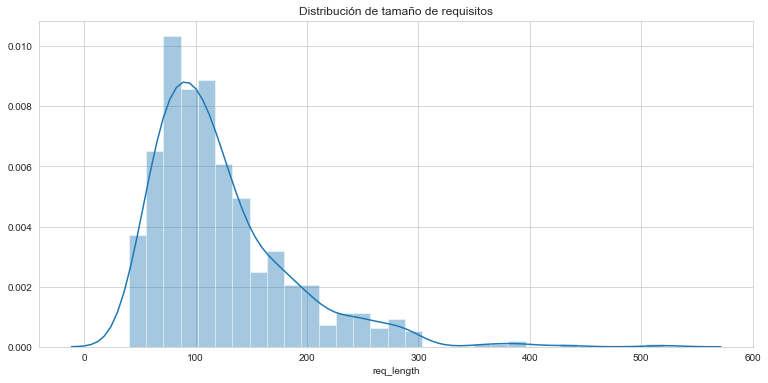

In [7]:
plt.figure(figsize=(12.8,6))
sns.distplot(data['req_length']).set_title('Distribución de tamaño de requisitos');

In [8]:
data['req_length'].describe()

count    625.000000
mean     122.480000
std       62.126757
min       40.000000
25%       79.000000
50%      107.000000
75%      146.000000
max      520.000000
Name: req_length, dtype: float64

In [9]:
quantile_95 = data['req_length'].quantile(0.95)
df_95 = data[data['req_length'] < quantile_95]

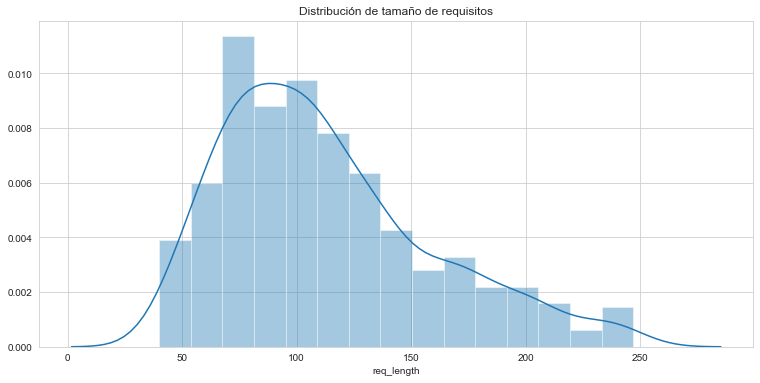

In [10]:
plt.figure(figsize=(12.8,6))
sns.distplot(df_95['req_length']).set_title('Distribución de tamaño de requisitos');

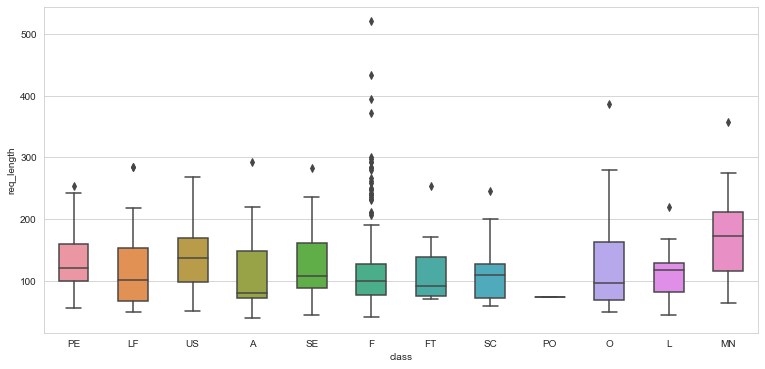

In [11]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=data, x='class', y='req_length', width=.5);

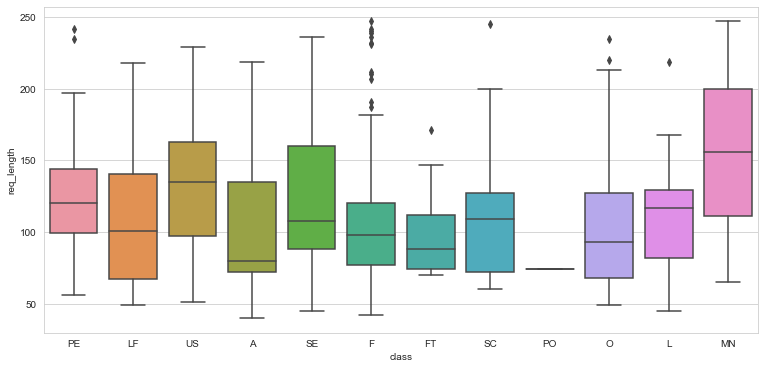

In [12]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df_95, x='class', y='req_length');

### Distribución de Dataset

Análisis proporcionado en _Automatically Classifying Functional and Non-functional Requirements Using Supervised Machine Learning_

| Categoría | Cantidad | Porcentage | Tamaño |
| - | -: | -: | -: |
| Funcional (F) | 255 | 40.80% | 20 |
| Avalilability (A) | 21 | 3.36% | 19 |
| Faul Tolerance (FT) | 10 | 1.60% | 19 |
| Legal (L) | 13 | 2.08% | 18 |
| Look & Feel (LF) | 38 | 6.08% | 20 |
| Mantainabilty (MN) | 17 | 2.72% | 28 |
| Operational (O) | 62 | 9.92% | 20 |
| Performance (PE) | 54 | 8.64% | 22 |
| Portability (PO) | 1 | 0.16% | 14 |
| Scalability (SC) | 21 | 3.36% | 18 |
| Security (SE) | 66 | 10.56% | 20 |
| Usability (US) | 67 | 10.72% | 22 |
| **Total** | **625** | **100%** |  |

## Feature Engineering

El procedimiento siguiente incluye el preprocesamiento del texto para el entrenamiento de los modelo de _machine learning_. Los pasos son lo siguientes:
1. **Limpieza y preparación de texto:** Se retiran caracteres especiales, signos de puntuación, stop words y pronombres posesivos. Se hace una conversión a minúsculas y lemanización.
2. **Label coding:** Se crea un diccionario para mapear cada categoría en un código específico.
3. **Separación de _Train_ y _Test_ sets:** Preparación de conjuntos para uso de los modelos de ML
4. **Representación de Texto:** Uso de puntuaciones TF-IDF para la representación de texto.

In [43]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
import numpy as np

### Limpieza y preparación de texto

#### 1.1 Limpiado de caracteres especiales

Se retiran los caracteres que se identifican de lasiguiente forma:

* ``\r``
* ``\n``
* ``\`` before possessive pronouns (`government's = government\'s`)
* ``\`` before possessive pronouns 2 (`Yukos'` = `Yukos\'`)
* ``"`` when quoting text

In [14]:
data['Content_Parsed_1'] = data['RequirementText'].str.replace(r'\\r',' ', regex=True)
data['Content_Parsed_1'] = data['Content_Parsed_1'].str.replace(r'\\n',' ', regex=True)
data['Content_Parsed_1'] = data['Content_Parsed_1'].str.replace(r'\\t',' ', regex=True)
data['Content_Parsed_1'] = data['Content_Parsed_1'].str.replace(r'    ',' ', regex=True)
data['Content_Parsed_1'] = data['Content_Parsed_1'].str.replace(r'""','', regex=True)

#### 1.2 Upcase/downcase

Conversión de todo el texto a minúsculas

In [15]:
data['Content_Parsed_2'] = data['Content_Parsed_1'].str.lower()

#### 1.3 Signos de puntuación

Remoción de signos de puntuación, pues no agregan significado a la clasificación

In [16]:
punctuation_signs = list("?:!.,;")
data['Content_Parsed_3'] = data['Content_Parsed_2']

for punct_sign in punctuation_signs:
    data['Content_Parsed_3'] = data['Content_Parsed_3'].str.replace(punct_sign, '')

#### 1.4 Pronombres posesivos

Se retiran todos los casos de poseción, pues no agregan significdo adicional, casos como `Luke's` se tornan `Luke`

In [17]:
data['Content_Parsed_4'] = data['Content_Parsed_3'].str.replace("'s'","", regex=True)

#### 1.5 Stemming y Lematization

En este caso, se recurre únicamente a lemmatization, pues es normal que el proceso de stemming retorne palabras inexistentes. En el caso del análisis morfológico que utiliza la segunda opción, se obtienen lemmas, u orígenes morfológiocos de palabras.

In [18]:
# Downloading punkt and wordnet from NLTK
nltk.download('punkt')
print("------------------------------------------------------------")
nltk.download('wordnet')

------------------------------------------------------------


[nltk_data] Downloading package punkt to /Users/adara/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/adara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
wordnet_lemmatizer = WordNetLemmatizer()
nrows = len(data)
lemmatized_text_list = []

for row in range(0, nrows):
    
    # Create an empty list containing lemmatized words
    lemmatized_list = []
    
    # Save the text and its words into an object
    text = data.loc[row]['Content_Parsed_4']
    text_words = text.split(" ")

    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    
    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)

In [20]:
data['Content_Parsed_5'] = lemmatized_text_list

#### 1.6 Stop words

Remoción de palabras que no agregan significado extra

In [21]:
# Downloading the stop words list
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/adara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
# Loading the stop words in english
stop_words = list(stopwords.words('english'))
stop_words[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [23]:
data['Content_Parsed_6'] = data['Content_Parsed_5']

for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    data['Content_Parsed_6'] = data['Content_Parsed_6'].str.replace(regex_stopword, '')

Es importante recordar, que aunque este preceso resulta con múltiples espacios entre oraciones, estos no significan semánticamente información extra. sin embargo también serán procesados en el proceso de `tokenize`.

### Resultado

Los siguientes son ejemplos de los cambios que sufre un requisito a lo largo de este procedimeinto:

#### Requisito Original

In [24]:
data.loc[5]['RequirementText']

"'The product shall ensure that it can only be accessed by authorized users.  The product will be able to distinguish between authorized and unauthorized users in all access attempts'"

#### Remoción de caracteres especiales

In [25]:
data.loc[5]['Content_Parsed_1']

"'The product shall ensure that it can only be accessed by authorized users.  The product will be able to distinguish between authorized and unauthorized users in all access attempts'"

#### Minúsculas

In [26]:
data.loc[5]['Content_Parsed_2']

"'the product shall ensure that it can only be accessed by authorized users.  the product will be able to distinguish between authorized and unauthorized users in all access attempts'"

#### Signos de puntuación

In [27]:
data.loc[5]['Content_Parsed_3']

"'the product shall ensure that it can only be accessed by authorized users  the product will be able to distinguish between authorized and unauthorized users in all access attempts'"

#### Pronombres posesivos

In [28]:
data.loc[5]['Content_Parsed_4']

"'the product shall ensure that it can only be accessed by authorized users  the product will be able to distinguish between authorized and unauthorized users in all access attempts'"

#### Steeming y Lemmatization

In [29]:
data.loc[5]['Content_Parsed_5']

"'the product shall ensure that it can only be access by authorize users  the product will be able to distinguish between authorize and unauthorized users in all access attempts'"

#### Stop words

In [30]:
data.loc[5]['Content_Parsed_6']

"' product shall ensure      access  authorize users   product   able  distinguish  authorize  unauthorized users   access attempts'"

### Limpiado de pasos intermedios

In [31]:
data

,ProjectID,RequirementText,class,id,req_length,Content_Parsed_1,Content_Parsed_2,Content_Parsed_3,Content_Parsed_4,Content_Parsed_5,Content_Parsed_6
0,1,'The system shall refresh the display every 60...,PE,1,56,'The system shall refresh the display every 60...,'the system shall refresh the display every 60...,'the system shall refresh the display every 60...,'the system shall refresh the display every 60...,'the system shall refresh the display every 60...,' system shall refresh display every 60 seconds'
1,1,'The application shall match the color of the ...,LF,1,98,'The application shall match the color of the ...,'the application shall match the color of the ...,'the application shall match the color of the ...,'the application shall match the color of the ...,'the application shall match the color of the ...,' application shall match color schema set ...
2,1,' If projected the data must be readable. On...,US,1,163,' If projected the data must be readable. On...,' if projected the data must be readable. on...,' if projected the data must be readable on ...,' if projected the data must be readable on ...,' if project the data must be readable on a ...,' project data must readable 10x10 proj...
3,1,' The product shall be available during normal...,A,1,200,' The product shall be available during normal...,' the product shall be available during normal...,' the product shall be available during normal...,' the product shall be available during normal...,' the product shall be available during normal...,' product shall available normal business h...
4,1,' If projected the data must be understandabl...,US,1,207,' If projected the data must be understandabl...,' if projected the data must be understandabl...,' if projected the data must be understandabl...,' if projected the data must be understandabl...,' if project the data must be understandable ...,' project data must understandable 10x10...
...,...,...,...,...,...,...,...,...,...,...,...
620,15,'\tUser access should be limited to the permis...,SE,1,283,' User access should be limited to the permiss...,' user access should be limited to the permiss...,' user access should be limited to the permiss...,' user access should be limited to the permiss...,' user access should be limit to the permissio...,' user access limit permissions grant ro...
621,15,' \tThe product must comply with the intranet ...,LF,1,285,' The product must comply with the intranet p...,' the product must comply with the intranet p...,' the product must comply with the intranet p...,' the product must comply with the intranet p...,' the product must comply with the intranet p...,' product must comply intranet page standa...
622,15,' The intranet pages should display appropriat...,LF,1,285,' The intranet pages should display appropriat...,' the intranet pages should display appropriat...,' the intranet pages should display appropriat...,' the intranet pages should display appropriat...,' the intranet page should display appropriate...,' intranet page display appropriately reso...
623,15,' \tThe users should be able to easily use the...,US,1,269,' The users should be able to easily use the ...,' the users should be able to easily use the ...,' the users should be able to easily use the ...,' the users should be able to easily use the ...,' the users should be able to easily use the ...,' users able easily use system successf...


In [32]:
list_columns = ["ProjectID", "RequirementText", "class", "id", "req_length", 'Content_Parsed_6']
data = data[list_columns]

data = data.rename(columns={'Content_Parsed_6': 'Content_Parsed'})

In [33]:
data

,ProjectID,RequirementText,class,id,req_length,Content_Parsed
0,1,'The system shall refresh the display every 60...,PE,1,56,' system shall refresh display every 60 seconds'
1,1,'The application shall match the color of the ...,LF,1,98,' application shall match color schema set ...
2,1,' If projected the data must be readable. On...,US,1,163,' project data must readable 10x10 proj...
3,1,' The product shall be available during normal...,A,1,200,' product shall available normal business h...
4,1,' If projected the data must be understandabl...,US,1,207,' project data must understandable 10x10...
...,...,...,...,...,...,...
620,15,'\tUser access should be limited to the permis...,SE,1,283,' user access limit permissions grant ro...
621,15,' \tThe product must comply with the intranet ...,LF,1,285,' product must comply intranet page standa...
622,15,' The intranet pages should display appropriat...,LF,1,285,' intranet page display appropriately reso...
623,15,' \tThe users should be able to easily use the...,US,1,269,' users able easily use system successf...


### Label coding

Cración de un diccionario para discretizar las categorías:

```python
category_codes = {
    'A': 0,
    'F': 1,
    'FT': 2,
    'L': 3,
    'LF': 4,
    'MN': 5,
    'O': 6,
    'PE': 7,
    'PO': 8,
    'SC': 9,
    'SE': 10,
    'US': 11,
}
```

In [34]:
category_codes = {
    'A': 0,
    'F': 1,
    'FT': 2,
    'L': 3,
    'LF': 4,
    'MN': 5,
    'O': 6,
    'PE': 7,
    'PO': 8,
    'SC': 9,
    'SE': 10,
    'US': 11,
}

In [35]:
# Category mapping
data['Category_Code'] = data['class']
data = data.replace({'Category_Code':category_codes})

In [36]:
data

,ProjectID,RequirementText,class,id,req_length,Content_Parsed,Category_Code
0,1,'The system shall refresh the display every 60...,PE,1,56,' system shall refresh display every 60 seconds',7
1,1,'The application shall match the color of the ...,LF,1,98,' application shall match color schema set ...,4
2,1,' If projected the data must be readable. On...,US,1,163,' project data must readable 10x10 proj...,11
3,1,' The product shall be available during normal...,A,1,200,' product shall available normal business h...,0
4,1,' If projected the data must be understandabl...,US,1,207,' project data must understandable 10x10...,11
...,...,...,...,...,...,...,...
620,15,'\tUser access should be limited to the permis...,SE,1,283,' user access limit permissions grant ro...,10
621,15,' \tThe product must comply with the intranet ...,LF,1,285,' product must comply intranet page standa...,4
622,15,' The intranet pages should display appropriat...,LF,1,285,' intranet page display appropriately reso...,4
623,15,' \tThe users should be able to easily use the...,US,1,269,' users able easily use system successf...,11


### Train - test split

Separación de conjunto de entrenamiento y de prueba. Par este caso, se extrae una muestra pequeña de prueba, que representa el 15% del conjunto original.

In [98]:
X_train, X_test, y_train, y_test = train_test_split(data['Content_Parsed'], 
                                                    data['Category_Code'], 
                                                    test_size=0.10, 
                                                    random_state=8)

### Representación de Texto

Se identificán mútiples técnicas de representación textulal:

* Count Vectors as features
* TF-IDF Vectors as features
* Word Embeddings as features
* Text / NLP based features
* Topic Models as features

Se usará para esta práctica `TF-IDF Vectors as features`

Está técnica requirede de múltiples parámetros:

* `ngram_range`: We want to consider both unigrams and bigrams.
* `max_df`: When building the vocabulary ignore terms that have a document
    frequency strictly higher than the given threshold
* `min_df`: When building the vocabulary ignore terms that have a document
    frequency strictly lower than the given threshold.
* `max_features`: If not None, build a vocabulary that only consider the top
    max_features ordered by term frequency across the corpus.

See `TfidfVectorizer?` for further detail.

Es importante remarcar que se pueden experimentar con diferentes parámetros para maximizar la capacidad de predicción. Los parámetros iniciales son los siguientes:

In [99]:
# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [100]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(562, 155)
(63, 155)


En este caso sólo se realizó la transformación en el **test set**.

Se puede utilizar el método de feature selection de Chi squared para identificar cómo se  orrelacionan los unigramas y bigramas de cada categoría:

In [ ]:
from sklearn.feature_selection import chi2

for Product, category_id in sorted(category_codes.items()):
    features_chi2 = chi2(features_train, labels_train == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-5:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

Se puede notar que los bigramas más característicos coresponden a la estructura básica de un requisito: _"El sistema deberá ...", "El producto deberá ...", "Los usuarios podrán..."._

De esta forma se identifican los unigramas como los más característicos de una categoría.

In [102]:
bigrams

['application shall',
 'dispute application',
 'system must',
 'staff members',
 'shall available',
 'system shall',
 'members shall',
 'program administrators',
 'shall allow',
 'shall ability',
 'include limit',
 'allow user',
 'program study',
 'wcs system',
 'shall provide',
 'prefer repair',
 'shall access',
 'repair facility',
 'website shall',
 'dispute case',
 'product must',
 'nursing staff',
 'recycle part',
 'shall display',
 'dispute system',
 'shall able',
 'administrators nursing',
 'user shall',
 'product shall',
 'must able',
 'users shall']

## Entrenamiento de Modelo de _Machine Learning_

Una vez creados los _feature vectors_, se provarán con diferentes modelos de clasificación de ML, para identificar los que tengan el mejor rendimeinto. Se probarán: 

* Random Forest
* Support Vector Machine
* K Nearest Neighbors
* Multinomial Naïve Bayes
* Multinomial Logistic Regression
* Gradient Boosting

La metodología para el entrenamiento de cada modelo será la siguiente:

1. Se deciden los hiperparámetros para afinar el modelo.
2. Se definen las métricas con las que se entranará el modelo. Se probará `accuracy`, `precision`, `recall`y `F-measure`.
3. Se realizará un proceso de `Randomized Search Cross Validation` para identificar la región de hiperparámetros con los que se logre la mayor `accuracy`.
4. Una vez identificada la región, se usará un proceso de `Grid Search Cross Validation` para identificar de forma exhaustiva la mejor combinación de hiperparámetros.
5. Conseguida la mejor combinación de hiperparámetros, se obtendrá el `accuracy` tanto del _training set_ como del _test set_, el reporte de la clasificación y la matriz de confusión.
6. Finalmente, se calculará el `accuracy` de un modelo con hiperparámetros _default_, para identificar si es posible obtener mejores resultados a través de la afinación de estos parámetros.

Es importante remarcar, que los modelos sólo tienen conocimiento de las _categorias_ que define el dataset, mas no es una taxonomía específica. Así mismo, de encontrarse atributos de calidad con otra categoría externa a las identificadas en el entrenamiento, es seguro que será mal clasificado.

### Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit

Dimensiones de los vectores:

In [104]:
print(features_train.shape)
print(features_test.shape)

(562, 155)
(63, 155)


#### Cross-Validation for Hyperparameter tuning

Hiperparámetros por defecto:

In [105]:
rf_0 = RandomForestClassifier(random_state = 8)

print('Parameters currently in use:\n')
pprint(rf_0.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 8,
 'verbose': 0,
 'warm_start': False}


Los hiperparámetros que se afinarán son los siguientes:

* `n_estimators` = number of trees in the forest.
* `max_features` = max number of features considered for splitting a node
* `max_depth` = max number of levels in each decision tree
* `min_samples_split` = min number of data points placed in a node before the node is split
* `min_samples_leaf` = min number of data points allowed in a leaf node
* `bootstrap` = method for sampling data points (with or without replacement)

#### Randomized Search Cross Validation

Se define el _grid_

In [107]:
# n_estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# max_features
max_features = ['auto', 'sqrt']

# max_depth
max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
max_depth.append(None)

# min_samples_split
min_samples_split = [2, 5, 10]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]

# bootstrap
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [20, 40, 60, 80, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}


##### Búsqueda aleatoria

In [108]:
# First create the base model to tune
rfc = RandomForestClassifier(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  2.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

Los mejores hiperparámetros encontrados en la búsqueda aleatoria son:

In [109]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}

The mean accuracy of a model with these hyperparameters is:
0.6370106761565836


A partir de la región de hiperparámetros identificados, se puede ser más específico por _Grid Search Cross Validation_

#### Grid Search Cross Validation

In [111]:
# Create the parameter grid based on the results of random search 
bootstrap = [False]
max_depth = [30, 40, 50]
max_features = ['sqrt']
min_samples_leaf = [1, 2, 4]
min_samples_split = [2, 5, 10]
n_estimators = [400]

param_grid = {
    'bootstrap': bootstrap,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators
}

# Create a base model
rfc = RandomForestClassifier(random_state=8)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:   51.5s finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_...
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=8,
                                              verbose=0, warm_start=False),
  

Los mejores hiperparámetros obtenidos son los siguientes:

In [112]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'bootstrap': False, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 400}

The mean accuracy of a model with these hyperparameters is:
0.6146953405017921


Las características del mejor modelo de Random Forest determinado son las siguientes:

In [113]:
best_rfc = grid_search.best_estimator_
best_rfc

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=40, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

#### Ajuste del modelo y rendimiento

Se ajusta el modelo con los datos de entrenamiento

In [114]:
best_rfc.fit(features_train, labels_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=40, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

Se calculan las predicciones

In [115]:
rfc_pred = best_rfc.predict(features_test)

The conditional class probabilities can be obtained by typing:

`rfc_pred = best_rfc.predict_proba(features_test)`

Para el análisis del rendimiento se usarán una matriz de confusión, un reporte del clasificador y el `accuracy`con los conjuntos de entrenamiento y de prueba.

##### Training Accuracy

In [116]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_rfc.predict(features_train)))

The training accuracy is: 
0.9822064056939501


##### Test Accuracy

In [117]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, rfc_pred))

The test accuracy is: 
0.7619047619047619


#### Classification Report

In [139]:
# Classification report
print("Classification report")
print(classification_report(labels_test,rfc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.81      0.97      0.88        30
           2       1.00      0.33      0.50         3
           4       0.50      0.67      0.57         3
           5       0.00      0.00      0.00         0
           6       0.75      0.75      0.75         8
           7       1.00      1.00      1.00         3
           9       1.00      0.33      0.50         3
          10       0.67      0.29      0.40         7
          11       0.67      0.80      0.73         5

    accuracy                           0.76        63
   macro avg       0.64      0.51      0.53        63
weighted avg       0.77      0.76      0.74        63



#### Matriz de Confusión

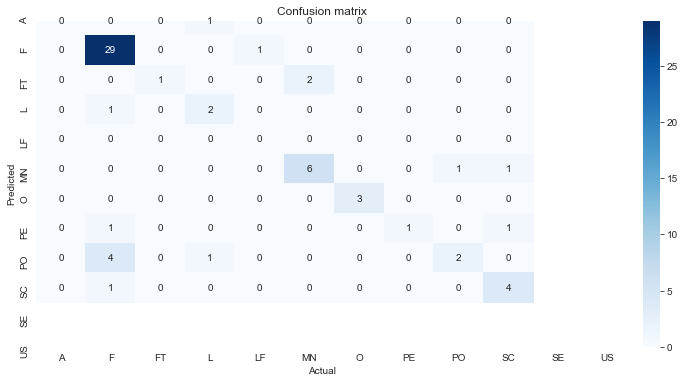

In [140]:
aux_df = data[['class', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, rfc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['class'].values, 
            yticklabels=aux_df['class'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

Comparación de afinado de hiperparámetros

In [120]:
base_model = RandomForestClassifier(random_state = 8)
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

0.7142857142857143

In [121]:
best_rfc.fit(features_train, labels_train)
accuracy_score(labels_test, best_rfc.predict(features_test))

0.7619047619047619

Dado que se realizará un análisis comparativo de modelos, se guardará el rendimeinto de Random Forest

In [122]:
d = {
     'Model': 'Random Forest',
     'Training Set Accuracy': accuracy_score(labels_train, best_rfc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, rfc_pred)
}

df_models_rfc = pd.DataFrame(d, index=[0])

In [123]:
df_models_rfc

,Model,Training Set Accuracy,Test Set Accuracy
0,Random Forest,0.982206,0.761905


Guardado de modelo

In [124]:
with open('./models/best_rfc.pickle', 'wb') as output:
    pickle.dump(best_rfc, output)
    
with open('./models/df_models_rfc.pickle', 'wb') as output:
    pickle.dump(df_models_rfc, output)

### Support Vector Machine

In [125]:
from sklearn import svm

#### Cross-Validation for Hyperparameter tuning
Hiperparámetros por defecto:

In [126]:
svc_0 =svm.SVC(random_state=8)

print('Parameters currently in use:\n')
pprint(svc_0.get_params())

Parameters currently in use:

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto_deprecated',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 8,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


We'll tune the following ones:

* `C`: Penalty parameter C of the error term.
* `kernel`: Specifies the kernel type to be used in the algorithm.
* `gamma`: Kernel coefficient.
* `degree`: Degree of the polynomial kernel function.

#### Randomized Search Cross Validation

Se define el siguiente _grid_:

In [127]:
# C
C = [.0001, .001, .01]

# gamma
gamma = [.0001, .001, .01, .1, 1, 10, 100]

# degree
degree = [1, 2, 3, 4, 5]

# kernel
kernel = ['linear', 'rbf', 'poly']

# probability
probability = [True]

# Create the random grid
random_grid = {'C': C,
              'kernel': kernel,
              'gamma': gamma,
              'degree': degree,
              'probability': probability
             }

pprint(random_grid)

{'C': [0.0001, 0.001, 0.01],
 'degree': [1, 2, 3, 4, 5],
 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
 'kernel': ['linear', 'rbf', 'poly'],
 'probability': [True]}


Se realiza la búsqueda aleatoria:

In [128]:
# First create the base model to tune
svc = svm.SVC(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=svc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   27.4s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=False,
                                 random_state=8, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=50, n_jobs=None,
                   param_distributions={'C': [0.0001, 0.001, 0.01],
                                        'degree': [1, 2, 3, 4, 5],
                                        'gamma': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100],
                                        'kernel': ['linear', 'rbf', 'poly'],
                                        'probability': [True]},
                   pre_dispatch='2*n_jobs', random

Los mejores hiperparámetros encontrados en la búsqueda aleatoria son:

In [129]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'probability': True, 'kernel': 'poly', 'gamma': 10, 'degree': 4, 'C': 0.01}

The mean accuracy of a model with these hyperparameters is:
0.5249110320284698


A partir de la región de hiperparámetros identificados, se puede ser más específico por _Grid Search Cross Validation_

#### Grid Search Cross Validation

In [130]:
# Create the parameter grid based on the results of random search 
C = [.0001, .001, .01, .1]
degree = [3, 4, 5]
gamma = [1, 10, 100]
probability = [True]

param_grid = [
  {'C': C, 'kernel':['linear'], 'probability':probability},
  {'C': C, 'kernel':['poly'], 'degree':degree, 'probability':probability},
  {'C': C, 'kernel':['rbf'], 'gamma':gamma, 'probability':probability}
]

# Create a base model
svc = svm.SVC(random_state=8)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=svc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:   17.5s finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=8, shrinking=True,
                           tol=0.001, verbose=False),
             iid='wa...one,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1], 'kernel': ['linear'],
                          'probability': [True]},
                         {'C': [0.0001, 0.001, 0.01, 0.1], 'degree': [3, 4, 5],
                          'kernel': ['poly'], 'probability': [True]},
                         {'C': [0.0001, 0.001, 0.01, 0.1],
                          'gamma': [1, 10, 100], 'kernel': ['rbf'],
                          'probability': [True]}],
             pre_

Los mejores hiperparámetros encontrados son:

In [131]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'C': 0.0001, 'kernel': 'linear', 'probability': True}

The mean accuracy of a model with these hyperparameters is:
0.3888888888888889


In [132]:
best_svc = grid_search.best_estimator_
best_svc

SVC(C=0.0001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=8,
    shrinking=True, tol=0.001, verbose=False)

#### Ajuste del modelo y rendimiento

Se ajusta el modelo con los datos de entrenamiento

In [133]:
best_svc.fit(features_train, labels_train)

SVC(C=0.0001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=8,
    shrinking=True, tol=0.001, verbose=False)

Se calculan las predicciones

In [134]:
svc_pred = best_svc.predict(features_test)

The conditional class probabilities can be obtained by typing:

`svc_pred = best_svc.predict_proba(features_test)`

Para el análisis del rendimiento se usarán una matriz de confusión, un reporte del clasificador y el `accuracy`con los conjuntos de entrenamiento y de prueba.

##### Training Accuracy

In [135]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_svc.predict(features_train)))

The training accuracy is: 
0.400355871886121


##### Test Accuracy

In [136]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, svc_pred))

The test accuracy is: 
0.47619047619047616


#### Classification Report

In [137]:
# Classification report
print("Classification report")
print(classification_report(labels_test,svc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.48      1.00      0.65        30
           2       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         5

    accuracy                           0.48        63
   macro avg       0.05      0.11      0.07        63
weighted avg       0.23      0.48      0.31        63



#### Matriz de Confusión

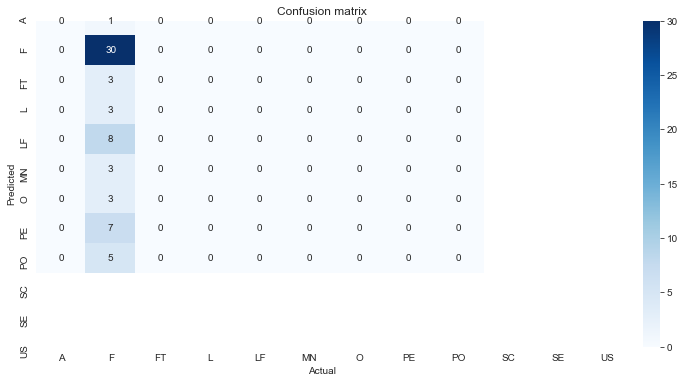

In [138]:
aux_df = data[['class', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, svc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['class'].values, 
            yticklabels=aux_df['class'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

Comparación de afinado de hiperparámetros

In [141]:
base_model = svm.SVC(random_state = 8)
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

0.47619047619047616

In [142]:
best_svc.fit(features_train, labels_train)
accuracy_score(labels_test, best_svc.predict(features_test))

0.47619047619047616

Dado que se realizará un análisis comparativo de modelos, se guardará el rendimeinto de Random Forest

In [143]:
d = {
     'Model': 'SVM',
     'Training Set Accuracy': accuracy_score(labels_train, best_svc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, svc_pred)
}

df_models_svc = pd.DataFrame(d, index=[0])

In [145]:
df_models_svc

,Model,Training Set Accuracy,Test Set Accuracy
0,SVM,0.400356,0.47619


Guardado del modelo

In [146]:
with open('Models/best_svc.pickle', 'wb') as output:
    pickle.dump(best_svc, output)
    
with open('Models/df_models_svc.pickle', 'wb') as output:
    pickle.dump(df_models_svc, output)